In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = '../data/cleaned.xlsx'
df_cleaned = pd.read_excel(file_path)

## Correlation Heatmap – Feature Relationships

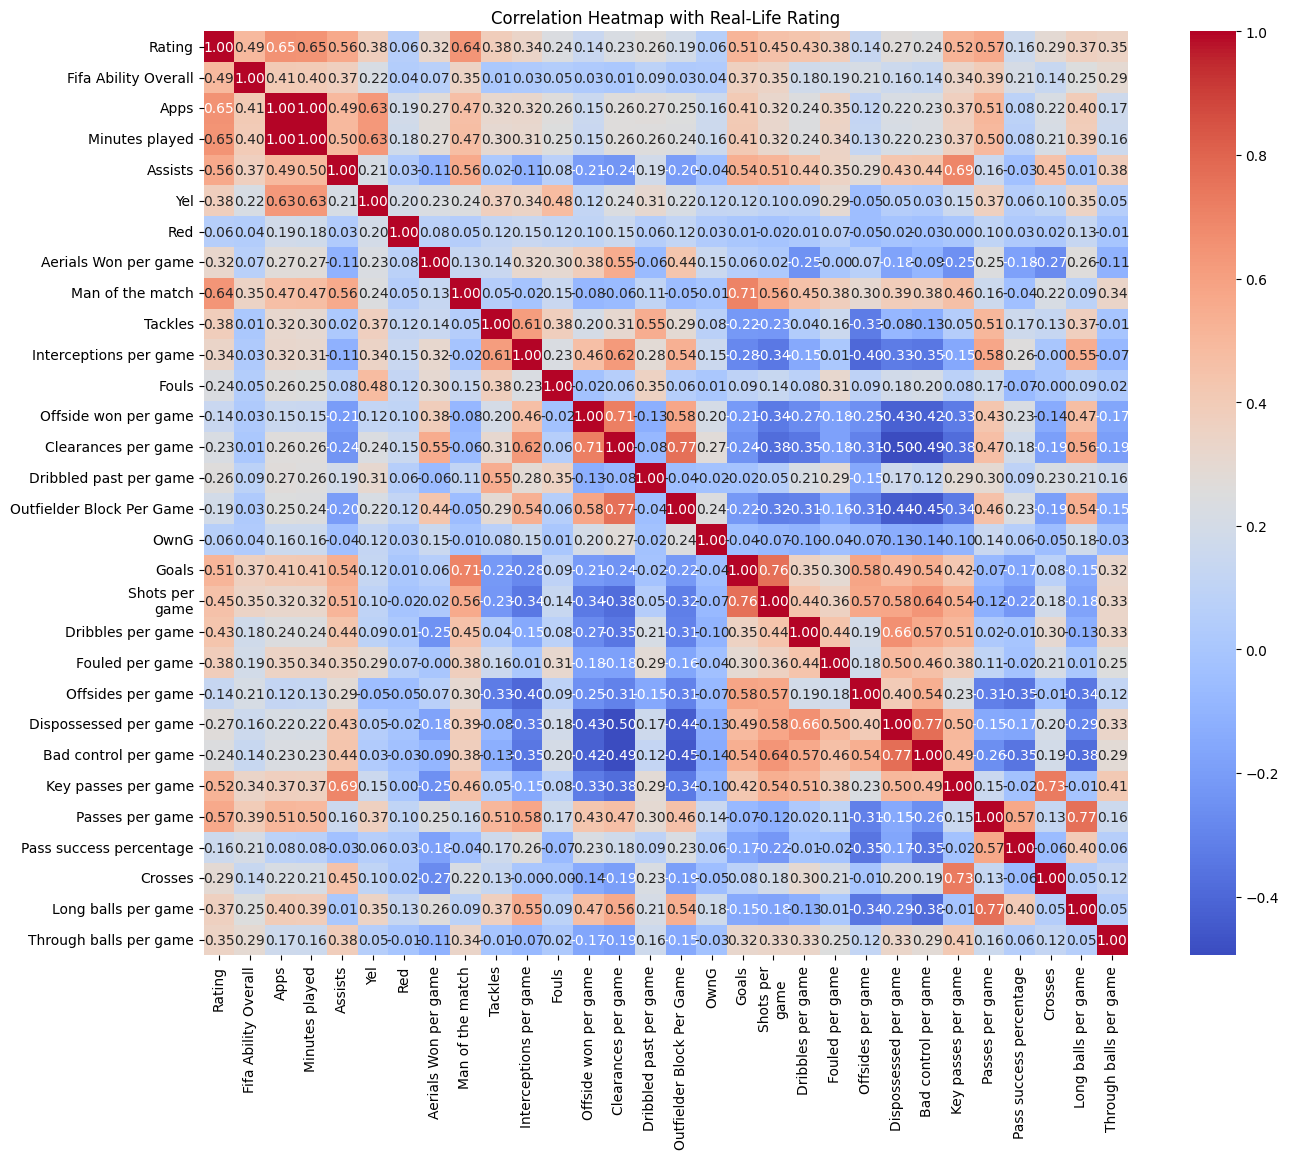

In [8]:
# Add Rating back temporarily for correlation plot
df_corr = df_cleaned.copy()
df_corr['Rating'] = df['Rating']

# Select only numeric columns
df_corr_numeric = df_corr.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df_corr_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap with Real-Life Rating")
plt.show()

## Pairplot – Explore key relationships visually

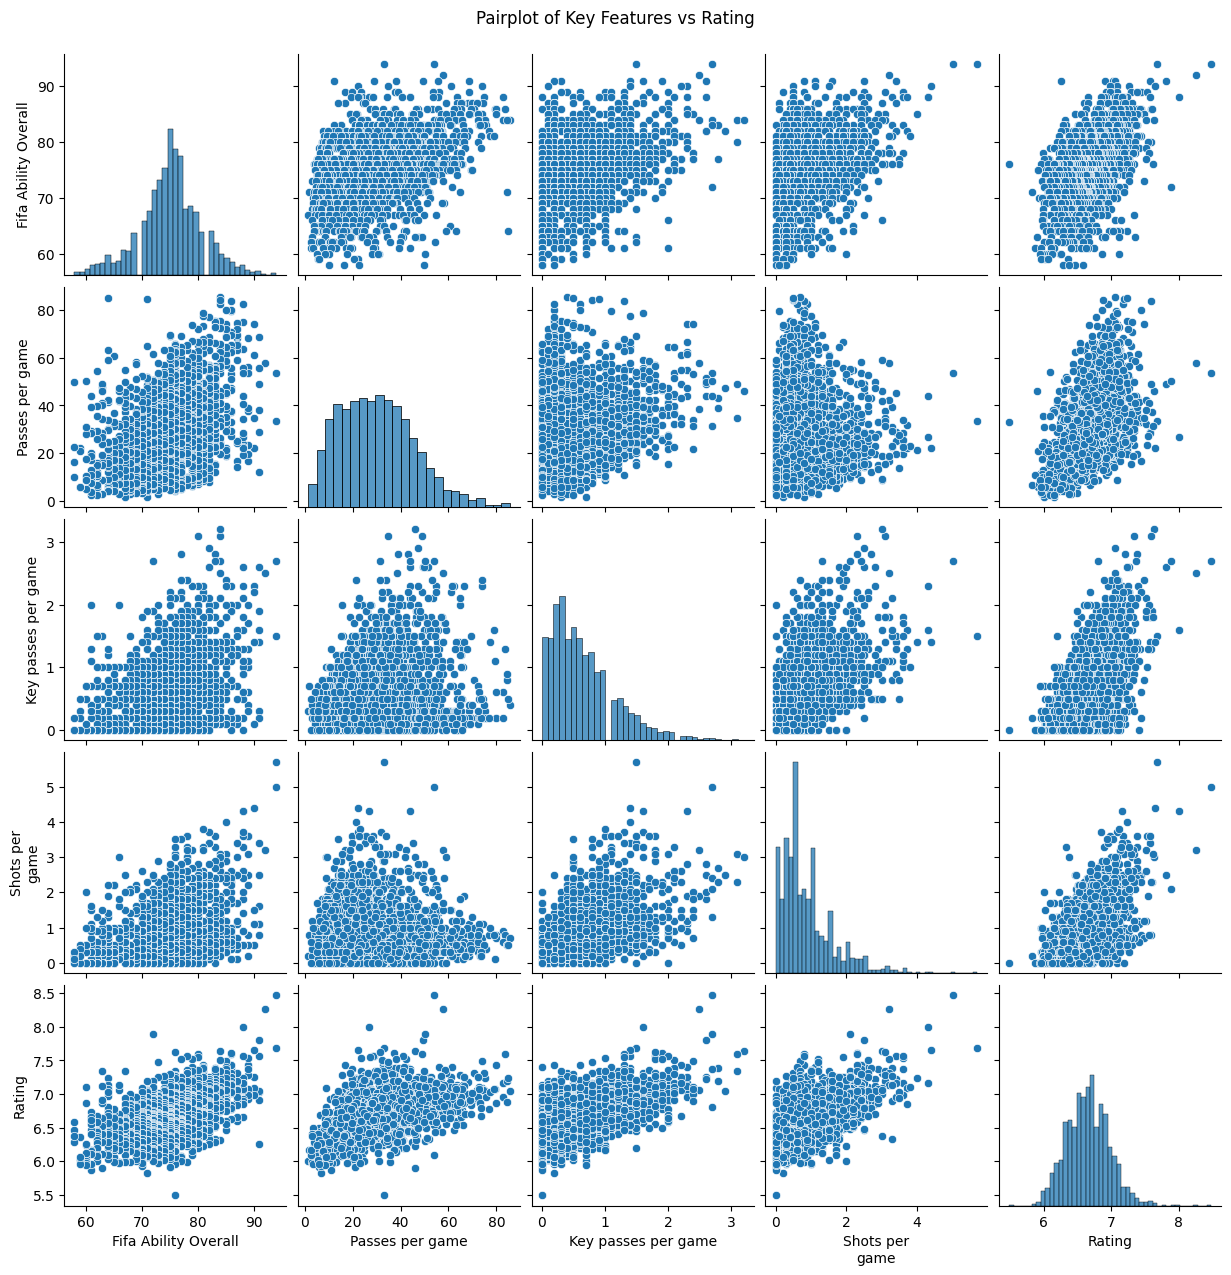

In [11]:
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Ensure column names match the actual DataFrame columns
key_features = ['Fifa Ability Overall', 'Passes per game', 'Key passes per game', 'Shots per\ngame', 'Rating']

# Check if all key features exist in the DataFrame
missing_features = [feature for feature in key_features if feature not in df_corr.columns]
if missing_features:
	raise KeyError(f"The following features are missing in the DataFrame: {missing_features}")

sns.pairplot(df_corr[key_features])
plt.suptitle("Pairplot of Key Features vs Rating", y=1.02)
plt.show()

## Boxplot of Rating by Simplified Position – Performance by Role

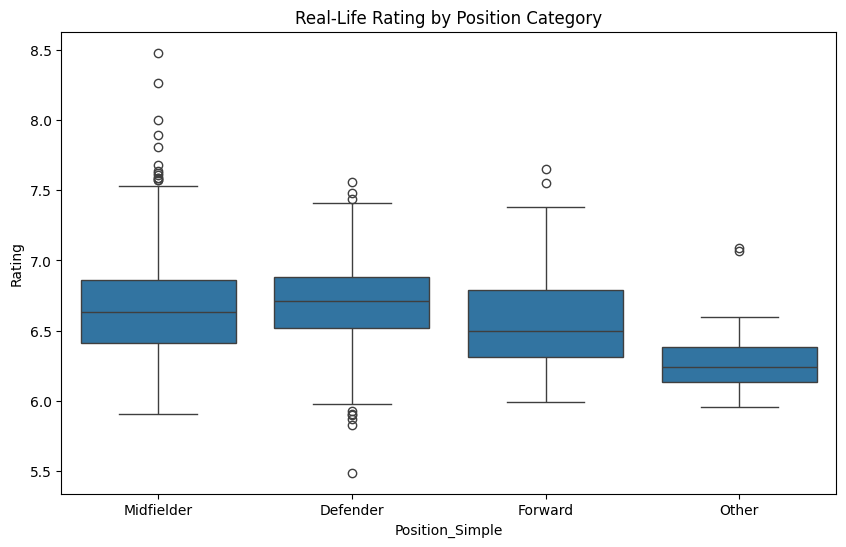

In [12]:
def simplify_position(pos):
    if 'D' in pos and not 'DM' in pos: return 'Defender'
    if 'M' in pos: return 'Midfielder'
    if 'FW' in pos: return 'Forward'
    return 'Other'

df_corr['Position_Simple'] = df['Position'].apply(simplify_position)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_corr, x='Position_Simple', y='Rating')
plt.title("Real-Life Rating by Position Category")
plt.show()


## Distribution Plot of Rating – Target Distribution Insight

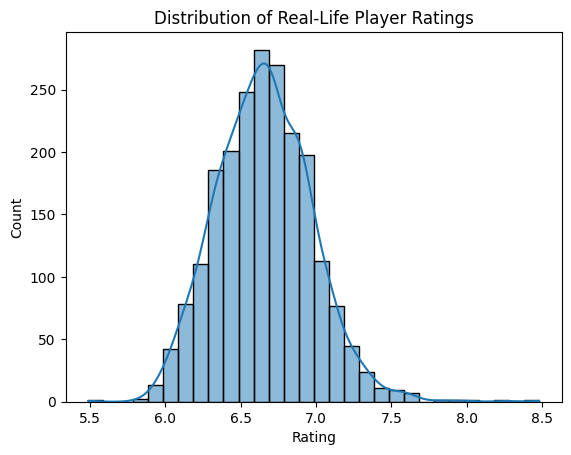

In [13]:
sns.histplot(df['Rating'], kde=True, bins=30)
plt.title("Distribution of Real-Life Player Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()